## Final Project Submission

Please fill out:
* Student name: **Nicholas Donovan**
* Student pace: self paced / **part time** / full time
* Scheduled project review date/time: **2/7/19 @ 2:15pm**
* Instructor name: **Jeff Herman**
* Blog post URL: https://medium.com/@nicodonovan/fighting-fraud-flatiron-data-science-project-1-280b63249253


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

# OSEMN Model

For our current project, our team decided on using the OSEMN model as the backbone for our analysis. We felt that it was the most straightforward approach, giving us a lot of flexibility and versatility to apply our findings to a wide-ranging audience. 

# O: Obtain
We will be using the King County House Sales dataset to predict the sale price of houses as accurately as possible.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline
# loading the data into a dataframe
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
len(df)

21597

21 total columns

21,597 total entries

# S: Scrub 
Here we will be further investigating our dataset. This includes identifying and removing null values, replacing values, distinguishing between continuous and categorical columns and converting formats. As well as any other issues that may come up during this exploratory process. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
to_drop = ["id", "date", "zipcode", "lat", "long"]
df.drop(to_drop, axis=1, inplace=True)

The "id" and "date" columns were dropped as they will not be used for this analysis and model building. Additionally, after multiple attempts to include the "zipcode", "lat" and "long" columns, I decided that they provided too large of a technical challenge without any meaningful improvment to the model. In short, they created too many dummy categories during the one-hot encoding stage to process efficently.  

Based on our findings from the dataframe's metadata, I noticed that only two columns were cast at strings (object). "Date" seemed to be correctly cast as a string, but "sqft_basement" did not seem appropriate as a string, so it was further inspected. 

In [5]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [6]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
450.0       103
480.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
          ...  
2130.0        1
4130.0        1
65.0          1
2850.0        1
415.0         1
143.0         1
666.0         1
915.0         1
374.0         1
2600.0        1
1245.0        1
588.0         1
3480.0        1
946.0         1
2190.0        1
1930.0        1
2120.0        1
508.0         1
652.0         1
1960.0        1
1880.0        1
768.0         1
875.0         1
276.0         1
2490.0        1
2250.0        1
2196.0        1
2050.0        1
2350.0        1
2390.0        1
Name: sqft_basement, Len

The column "sqft_basement" seems to be incorrectly cast as a string type despite containing numerical data. This was due to the fact that there are 454 entries that have "?" as their value, symbolizing unknown data for this column. I decided to drop these values as it only constitutes about a 2% reduction. 

In [7]:
to_drop = df[df['sqft_basement'] == '?']
df.drop(to_drop.index, axis=0, inplace=True)
df.sqft_basement = df.sqft_basement.astype('float')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 16 columns):
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       18804 non-null float64
view             21082 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null int64
yr_renovated     17389 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.7 MB


In [10]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
sqft_living15       0
sqft_lot15          0
dtype: int64

Now we are checking to see if the data contains any null values. And by the looks of our results, we can see that "waterfront", "view" and "yr_renovated" all contain null values. We will inspect each individually. 

In [11]:
df.view.value_counts()

0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

In [12]:
df['view'].fillna(0, inplace=True)

In [13]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
sqft_living15       0
sqft_lot15          0
dtype: int64

For the "views" column, I decided to replace the null values with the most common value. For "views", the most common value was 0.0. Since there were only 15 total null values for this column and 0.0 had an order of magnitude more counts than the other values, I felt this would minimally skew the data, if at all. 

In [14]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [15]:
df.waterfront.value_counts()

0.0    18662
1.0      142
Name: waterfront, dtype: int64

In [16]:
df.waterfront = df.waterfront.astype("str")
df['waterfront'].fillna('nan')

0        nan
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
7        0.0
8        0.0
9        0.0
10       nan
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       nan
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
30       0.0
31       0.0
        ... 
21566    0.0
21567    nan
21568    0.0
21569    0.0
21570    0.0
21571    0.0
21572    0.0
21573    0.0
21574    0.0
21575    0.0
21576    0.0
21577    0.0
21578    nan
21579    0.0
21580    0.0
21582    nan
21583    0.0
21584    0.0
21585    0.0
21586    nan
21587    nan
21588    0.0
21589    0.0
21590    0.0
21591    0.0
21592    0.0
21593    0.0
21594    0.0
21595    nan
21596    0.0
Name: waterfront, Length: 21143, dtype: object

In [17]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
sqft_living15       0
sqft_lot15          0
dtype: int64

For the "waterfront" column, I noticed that it was incorrectly cast an numerical column despite being categorical data. So I changed its type from float to string. This allowed me to treat the null values as its own category.  

In [18]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 2001., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [19]:
df.yr_renovated.value_counts()

0.0       16666
2014.0       69
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2009.0       21
2004.0       21
2006.0       20
1989.0       18
2002.0       17
1998.0       15
1999.0       15
2008.0       15
1983.0       15
1984.0       15
2015.0       14
2010.0       14
1985.0       14
1986.0       14
1987.0       14
1991.0       14
1992.0       13
1994.0       13
2001.0       12
1997.0       12
1995.0       12
1996.0       11
          ...  
1968.0        6
1964.0        5
1975.0        5
1973.0        4
1965.0        4
1981.0        4
1969.0        4
1978.0        3
1963.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1972.0        3
1945.0        2
1962.0        2
1967.0        2
1974.0        2
1957.0        2
1940.0        2
1951.0        1
1948.0        1
1950.0        1
1976.0        1
1954.0        1
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Leng

In [20]:
df.yr_renovated.describe()

count    17389.000000
mean        82.991949
std        398.481819
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [21]:
to_drop = ["yr_renovated"]
df.drop(to_drop, axis=1, inplace=True)
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
sqft_living15    0
sqft_lot15       0
dtype: int64

I decided to drop the "yr_renovated" column. As a majority of houses in our data were not renovated, thus I decided it would not prove useful for our model. 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 15 columns):
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       21143 non-null object
view             21143 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null int64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: float64(5), int64(9), object(1)
memory usage: 2.6+ MB


Some categorical data was incorrectly encoded as integers/floats. These were converted to strings to better represent the categorical nature and be one-hot encoded later on in the process. 

In [23]:
df.bedrooms = df.bedrooms.astype("str")
df.bathrooms = df.bathrooms.astype("str")
df.floors = df.floors.astype("str")
df.view = df.view.astype("str")
df.condition = df.condition.astype("str")
df.grade = df.grade.astype("str")
df.yr_built = df.yr_built.astype("str")
#sdf.zipcode = sdf.zipcode.astype("str")
#sdf.lat = sdf.lat.astype("str")
#sdf.long = sdf.long.astype("str")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 15 columns):
price            21143 non-null float64
bedrooms         21143 non-null object
bathrooms        21143 non-null object
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null object
waterfront       21143 non-null object
view             21143 non-null object
condition        21143 non-null object
grade            21143 non-null object
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null object
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: float64(2), int64(5), object(8)
memory usage: 2.6+ MB


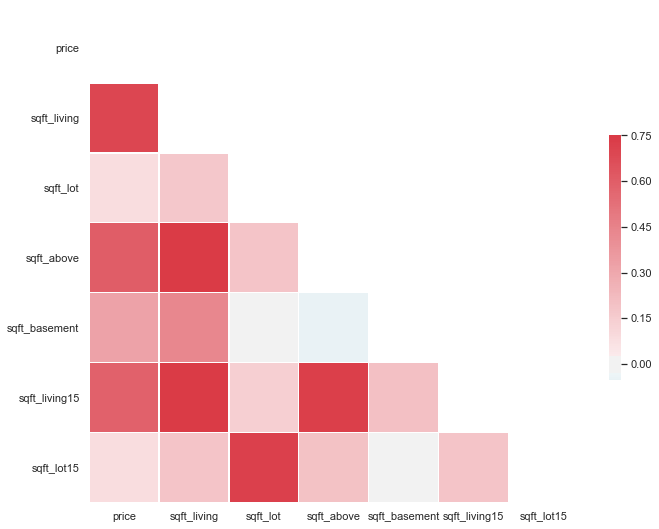

In [25]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
abs(df.corr()) > 0.75

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False
sqft_living,False,True,False,True,False,True,False
sqft_lot,False,False,True,False,False,False,False
sqft_above,False,True,False,True,False,False,False
sqft_basement,False,False,False,False,True,False,False
sqft_living15,False,True,False,False,False,True,False
sqft_lot15,False,False,False,False,False,False,True


Based on the heatmap and the correlation matrix (0.75 was used as a cutoff because generally, a correlation with an absolute value around 0.7-0.8 or higher is considered a high correlation), "sqft_living" is highly correlated with "sqft_living15" and "sqft_above". To solve this issue, the column was removed from our data. The rest of the data did not show any high correlation amongst each other.

In [27]:
to_drop = ["sqft_living"]
df.drop(to_drop, axis=1, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 14 columns):
price            21143 non-null float64
bedrooms         21143 non-null object
bathrooms        21143 non-null object
sqft_lot         21143 non-null int64
floors           21143 non-null object
waterfront       21143 non-null object
view             21143 non-null object
condition        21143 non-null object
grade            21143 non-null object
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null object
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: float64(2), int64(4), object(8)
memory usage: 2.4+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20104160>,
      dtype=object)

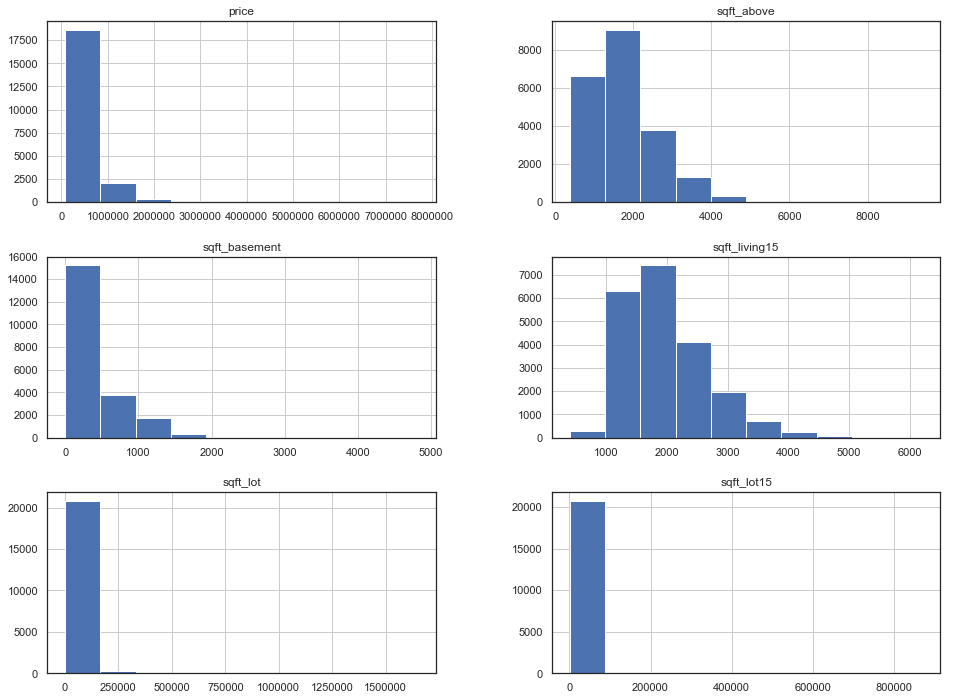

In [35]:
# histogram before normalization 
df.hist(figsize=[16,12])

In [38]:
# z-score normalization
df.sqft_lot = (df.sqft_lot - df.sqft_lot.mean()) / df.sqft_lot.std()
df.sqft_above = (df.sqft_above - df.sqft_above.mean()) / df.sqft_above.std()
df.sqft_basement = (df.sqft_basement - df.sqft_basement.mean()) / df.sqft_basement.std()
df.sqft_living15 = (df.sqft_living15 - df.sqft_living15.mean()) / df.sqft_living15.std()
df.sqft_lot15 = (df.sqft_lot15 - df.sqft_lot15.mean()) / df.sqft_lot15.std()

Here we are normalizing our data, which converts it to the same scale. We used z-score normalization, which is the most widely used method for normalization. 

# E: Explore
Exploratory Data Analysis (EDA): We need to better understand the distribution of data before we can begin building models. 

In [40]:
df.describe()

,price,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.114300e+04,2.114300e+04,2.114300e+04,2.114300e+04,2.114300e+04,2.114300e+04
mean,5.405107e+05,-2.688522e-18,2.150818e-17,-5.377044e-18,1.613113e-17,-8.065566e-18
std,3.680751e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,7.800000e+04,-3.534924e-01,-1.713004e+00,-6.595544e-01,-2.316378e+00,-4.449122e-01
25%,3.220000e+05,-2.437353e-01,-7.110841e-01,-6.595544e-01,-7.252339e-01,-2.811611e-01
50%,4.500000e+05,-1.812007e-01,-2.765165e-01,-6.595544e-01,-2.147845e-01,-1.881884e-01
75%,6.450000e+05,-1.065694e-01,5.081193e-01,6.059871e-01,5.435974e-01,-9.760813e-02
max,7.700000e+06,3.970647e+01,9.199470e+00,1.023314e+01,6.158541e+00,3.159676e+01


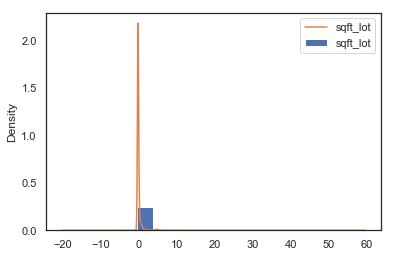

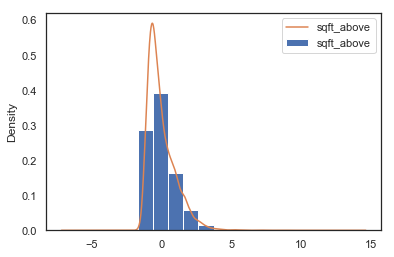

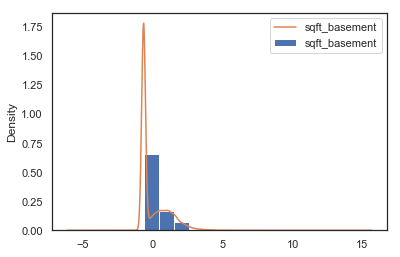

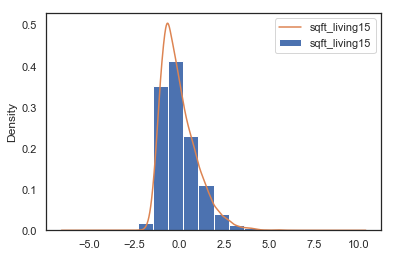

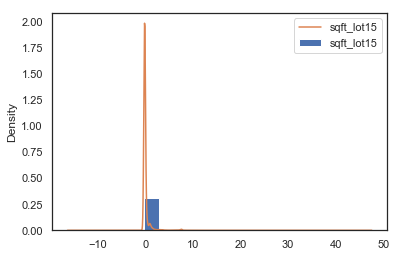

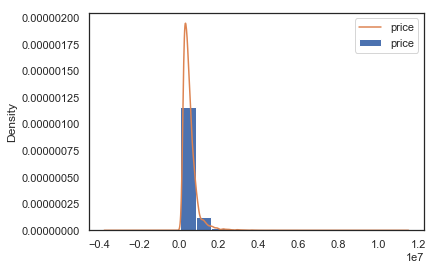

In [41]:
for column in ['sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price']:
    df[column].plot.hist(density=True )
    df[column].plot.kde(label=column )
    plt.legend()
    plt.show()
    
# use only continuous variables 

Scrubbing our data seemed to worked, except for "sqft_basement" which displays some multimodality. 

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


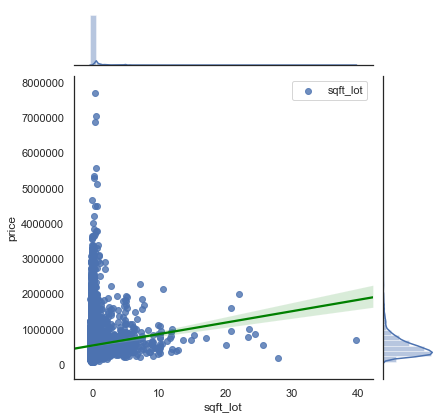

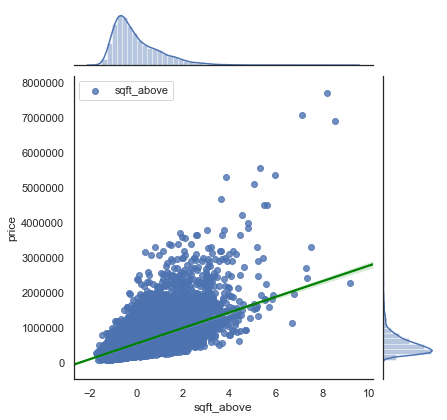

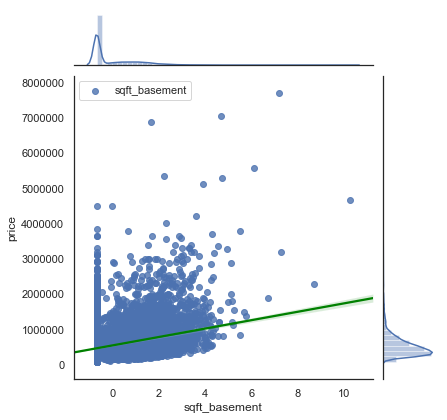

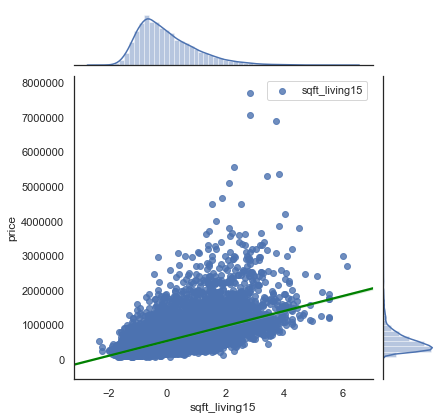

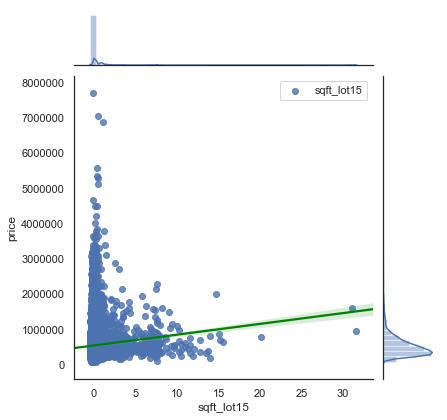

In [42]:
for column in ['sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']:
    sns.jointplot(x=column, y='price',
                  data=df, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()

The joint plot allows us to visualize a scatterplot, the distributions of two different columns, a kde plot, and a simple regression line all on the same visualization. Based on the results, all five indicators seem to have a positive relationship with price. 

In [43]:
df = pd.get_dummies(df)
df.head()

,price,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,bedrooms_1,bedrooms_10,bedrooms_11,bedrooms_2,...,yr_built_2006,yr_built_2007,yr_built_2008,yr_built_2009,yr_built_2010,yr_built_2011,yr_built_2012,yr_built_2013,yr_built_2014,yr_built_2015
0,221900.0,-0.229006,-0.735227,-0.659554,-0.943998,-0.260918,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,-0.190373,0.459834,0.244404,-0.433549,-0.187710,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,-0.123447,-1.230151,-0.659554,1.068631,-0.172141,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,-0.244779,-0.892154,1.396951,-0.914829,-0.284842,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,-0.170038,-0.131661,-0.659554,-0.273122,-0.192716,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# M: Model
An iterative process where we begin to build our regression model. 

In [44]:
df.iloc[:,0:20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 20 columns):
price             21143 non-null float64
sqft_lot          21143 non-null float64
sqft_above        21143 non-null float64
sqft_basement     21143 non-null float64
sqft_living15     21143 non-null float64
sqft_lot15        21143 non-null float64
bedrooms_1        21143 non-null uint8
bedrooms_10       21143 non-null uint8
bedrooms_11       21143 non-null uint8
bedrooms_2        21143 non-null uint8
bedrooms_3        21143 non-null uint8
bedrooms_33       21143 non-null uint8
bedrooms_4        21143 non-null uint8
bedrooms_5        21143 non-null uint8
bedrooms_6        21143 non-null uint8
bedrooms_7        21143 non-null uint8
bedrooms_8        21143 non-null uint8
bedrooms_9        21143 non-null uint8
bathrooms_0.5     21143 non-null uint8
bathrooms_0.75    21143 non-null uint8
dtypes: float64(6), uint8(14)
memory usage: 1.4 MB


In [45]:
for cat_names in df.iloc[:,6:].columns:
         df[cat_names] = df[cat_names].astype('category')

In [57]:
df.iloc[:,0:20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6329 entries, 20668 to 661
Data columns (total 20 columns):
price             6329 non-null float64
sqft_lot          6329 non-null float64
sqft_above        6329 non-null float64
sqft_basement     6329 non-null float64
sqft_living15     6329 non-null float64
sqft_lot15        6329 non-null float64
bedrooms_1        6329 non-null category
bedrooms_2        6329 non-null category
bedrooms_3        6329 non-null category
bedrooms_33       6329 non-null category
bedrooms_4        6329 non-null category
bedrooms_5        6329 non-null category
bedrooms_6        6329 non-null category
bedrooms_7        6329 non-null category
bedrooms_8        6329 non-null category
bedrooms_9        6329 non-null category
bathrooms_0.5     6329 non-null category
bathrooms_0.75    6329 non-null category
bathrooms_1.0     6329 non-null category
bathrooms_1.25    6329 non-null category
dtypes: category(14), float64(6)
memory usage: 434.0 KB


After one-hot encoding our categorical variables, I did a quick check to see their datatypes. After inspection, those categories were changed to the categorical datatype, so they could be properly integrated into our model. 

In [46]:
df.describe()

,price,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.114300e+04,2.114300e+04,2.114300e+04,2.114300e+04,2.114300e+04,2.114300e+04
mean,5.405107e+05,-2.688522e-18,2.150818e-17,-5.377044e-18,1.613113e-17,-8.065566e-18
std,3.680751e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,7.800000e+04,-3.534924e-01,-1.713004e+00,-6.595544e-01,-2.316378e+00,-4.449122e-01
25%,3.220000e+05,-2.437353e-01,-7.110841e-01,-6.595544e-01,-7.252339e-01,-2.811611e-01
50%,4.500000e+05,-1.812007e-01,-2.765165e-01,-6.595544e-01,-2.147845e-01,-1.881884e-01
75%,6.450000e+05,-1.065694e-01,5.081193e-01,6.059871e-01,5.435974e-01,-9.760813e-02
max,7.700000e+06,3.970647e+01,9.199470e+00,1.023314e+01,6.158541e+00,3.159676e+01


In [48]:
col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King County Houses: Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

King County Houses: Price~sqft_lot
------------------------------
['sqft_lot', 0.007732844956811813, 540510.7274275168, 32367.268318877967, 1.4301826266151583e-37]
King County Houses: Price~sqft_above
------------------------------
['sqft_above', 0.36619760286513114, 540510.7274275168, 222737.91256067622, 0.0]
King County Houses: Price~sqft_basement
------------------------------
['sqft_basement', 0.1056299556096223, 540510.7274275168, 119627.20209864987, 0.0]
King County Houses: Price~sqft_living15
------------------------------
['sqft_living15', 0.3438828169564687, 540510.7274275168, 215844.8219573556, 0.0]
King County Houses: Price~sqft_lot15
------------------------------
['sqft_lot15', 0.006920893744457479, 540510.7274275168, 30620.86730796857, 8.592560324246995e-34]


In [49]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,sqft_lot,0.00773284,540511,32367.3,1.43018e-37
2,sqft_above,0.366198,540511,222738,0
3,sqft_basement,0.10563,540511,119627,0
4,sqft_living15,0.343883,540511,215845,0
5,sqft_lot15,0.00692089,540511,30620.9,8.59256e-34


In [ ]:
my_cols = df.columns

my_cols1 = []
for col in my_cols: 
    my_cols.append(col.replace(".", ""))

df.columns = mycols1

In [ ]:
cols_bedroom= df.columns[6:15]
cols_bathroom = df.columns[16:40]
cols_floors = df.columns[41:46]
cols_waterfront = df.columns[47:49]
cols_view = df.columns[50:54]
cols_condition = df.columns[55:59]
cols_grade = df.columns[60:70]
cols_yr_built = df.columns[71:187]

cols = [cols_bedroom, cols_bathroom, cols_waterfront, cols_view, cols_condition, cols_grade, cols_yr_built]
for col in cols:
    sum_cols = "+".join(col)
    form = "price ~" + sum_cols
    model = smf.ols(formula= form, data= df).fit()
    print(model.summary())

In [58]:
df_final = df.drop(["sqft_lot", "sqft_lot15"], axis=1)
df_final.describe()

,price,sqft_above,sqft_basement,sqft_living15
count,2.114300e+04,2.114300e+04,2.114300e+04,2.114300e+04
mean,5.405107e+05,2.150818e-17,-5.377044e-18,1.613113e-17
std,3.680751e+05,1.000000e+00,1.000000e+00,1.000000e+00
min,7.800000e+04,-1.713004e+00,-6.595544e-01,-2.316378e+00
25%,3.220000e+05,-7.110841e-01,-6.595544e-01,-7.252339e-01
50%,4.500000e+05,-2.765165e-01,-6.595544e-01,-2.147845e-01
75%,6.450000e+05,5.081193e-01,6.059871e-01,5.435974e-01
max,7.700000e+06,9.199470e+00,1.023314e+01,6.158541e+00


"sqft_lot" and "sqft_lot15" were dropped because they resulted with R-squared values of < 0.01 in the single linear models. 

In [59]:
y = df_final[["price"]]
X = df_final.drop(["price"], axis=1)
X.head()

,sqft_above,sqft_basement,sqft_living15,bedrooms_1,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,...,yr_built_2006,yr_built_2007,yr_built_2008,yr_built_2009,yr_built_2010,yr_built_2011,yr_built_2012,yr_built_2013,yr_built_2014,yr_built_2015
0,-0.735227,-0.659554,-0.943998,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.459834,0.244404,-0.433549,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.230151,-0.659554,1.068631,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.892154,1.396951,-0.914829,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.131661,-0.659554,-0.273122,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
X.shape

(21143, 190)

In [62]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [65]:
r_list = []
adj_r_list = []
list_n = list(range(5,190,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
    r_list.append(r_squared)
    adj_r_list.append(adjusted_r_squared)

price    0.073968
dtype: float64
price    0.065571
dtype: float64
price    0.183251
dtype: float64
price    0.175845
dtype: float64
price    0.267482
dtype: float64
price    0.26084
dtype: float64
price    0.606994
dtype: float64
price    0.60343
dtype: float64
price    0.620841
dtype: float64
price    0.617402
dtype: float64
price    0.631919
dtype: float64
price    0.628581
dtype: float64
price    0.641489
dtype: float64
price    0.638238
dtype: float64
price    0.644724
dtype: float64
price    0.641502
dtype: float64
price    0.649149
dtype: float64
price    0.645967
dtype: float64
price    0.653646
dtype: float64
price    0.650505
dtype: float64
price    0.661151
dtype: float64
price    0.658079
dtype: float64
price    0.667139
dtype: float64
price    0.664121
dtype: float64
price    0.673616
dtype: float64
price    0.670657
dtype: float64
price    0.679067
dtype: float64
price    0.676157
dtype: float64
price    0.680543
dtype: float64
price    0.677646
dtype: float64
price    0.6

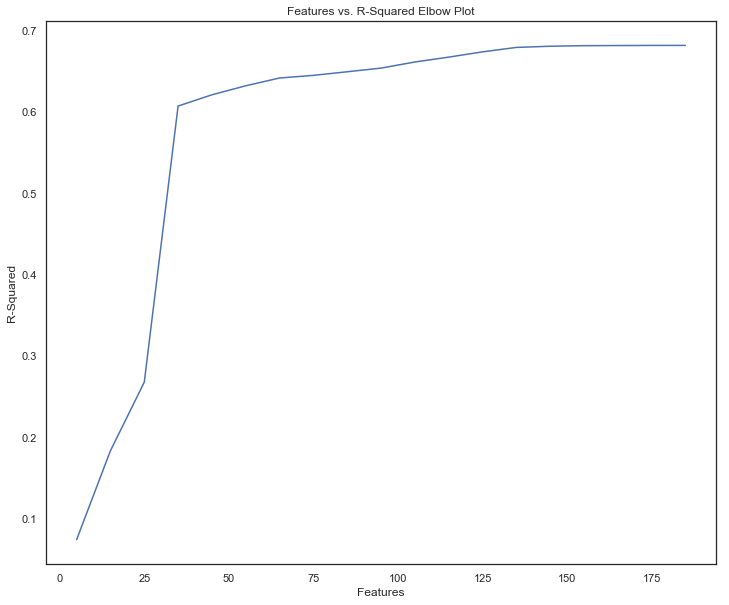

In [75]:
# elbow plot - where it plateaus is how many features you want 
# x is features, y is r-square

fig = plt.figure(figsize=(12,10))
plt.plot(list(range(5, 190, 10)), r_list)
plt.xlabel('Features')
plt.ylabel('R-Squared')
plt.title("Features vs. R-Squared Elbow Plot")
plt.show()

Feature ranking with recursive feature elimination. At around 50 features added, we can generously say that R-squared values have plateaued and it would be unnecessary to add more. Even at 50 features, we run the risk of overfitting our model. 

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

MSE_test = []
MSE_train = []
list_n = list(range(5,190,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
    MSE_test.append(mse_test)
    MSE_train.append(mse_train)

price    1.243500e+11
dtype: float64
price    1.298949e+11
dtype: float64
price    1.001173e+11
dtype: float64
price    1.056362e+11
dtype: float64
price    9.268395e+10
dtype: float64
price    1.011462e+11
dtype: float64
price    7.927276e+10
dtype: float64
price    8.609437e+10
dtype: float64
price    7.128083e+10
dtype: float64
price    7.789340e+10
dtype: float64
price    5.012719e+10
dtype: float64
price    4.246571e+29
dtype: float64
price    4.850401e+10
dtype: float64
price    1.664759e+31
dtype: float64
price    4.788360e+10
dtype: float64
price    5.964676e+31
dtype: float64
price    4.725823e+10
dtype: float64
price    1.365219e+29
dtype: float64
price    4.667615e+10
dtype: float64
price    1.544398e+27
dtype: float64
price    4.552546e+10
dtype: float64
price    1.570474e+30
dtype: float64
price    4.462813e+10
dtype: float64
price    1.827359e+29
dtype: float64
price    4.375870e+10
dtype: float64
price    4.049968e+29
dtype: float64
price    4.309968e+10
dtype: float64
p

Feature ranking with recursive feature elimination with a train-test-split. But this time we are looking at Mean Squared Error(MSE) instead of R-squared and adjusted R-squared. 

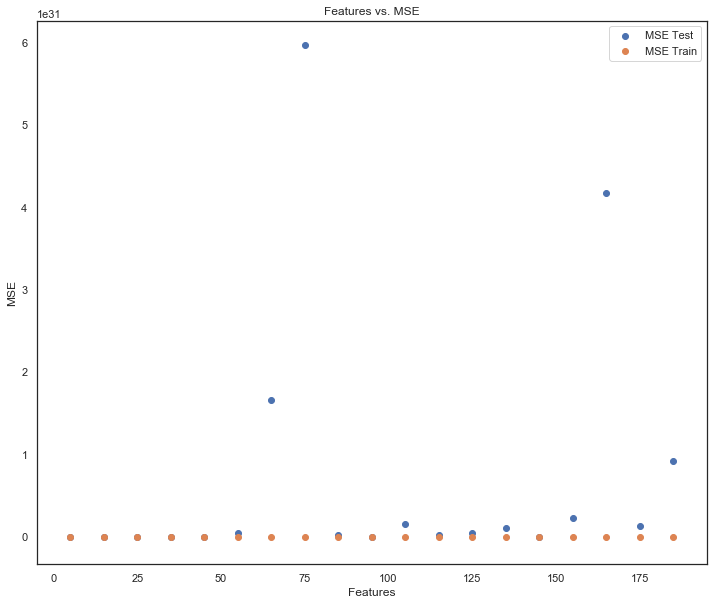

In [85]:
fig = plt.figure(figsize=(12,10))
plt.scatter(list(range(5, 190, 10)), MSE_test, label="MSE Test")
plt.scatter(list(range(5, 190, 10)), MSE_train, label="MSE Train")
plt.xlabel('Features')
plt.ylabel('MSE')
plt.title("Features vs. MSE")
plt.legend()
plt.show()

As we can see, the train Mean Square Error(MSE) significantly starts to deviate from the test MSE at around 50 features added. Thus showing we should be a lot more selective when picking features for our model. 

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# select 30 best predictors

select_30 = RFE(linreg, n_features_to_select = 30)
select_30 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-4.93596835e+10, -9.38955099e+32, -4.10737047e+10, -3.12987392e+31,
       -3.72554349e+32, -5.02590610e+10, -4.58978879e+10, -9.20427718e+31,
       -4.48212394e+10, -8.14453646e+29])

10-fold cross validation with the final model

In [84]:
selected_columns

Index(['bedrooms_1', 'bedrooms_10', 'bedrooms_11', 'bedrooms_2', 'bedrooms_3',
       'bedrooms_33', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7',
       ...
       'yr_built_2006', 'yr_built_2007', 'yr_built_2008', 'yr_built_2009',
       'yr_built_2010', 'yr_built_2011', 'yr_built_2012', 'yr_built_2013',
       'yr_built_2014', 'yr_built_2015'],
      dtype='object', length=185)

After using Recursive Feature Elimination (RFE) to select the 30 best predictors, we see that the bedroom and year built features were the best features for our model. 